In [ ]:
# for modules exposure
import sys

sys.path.append("../src/")

for line in sys.path:
     print(line)

In [30]:
import pandas as pd
import numpy as np
import json

In [17]:
# Available columns for LIP
LIP_columns = ('Time', 'Ex', 'Ey', 'Ez', 'Eq', 'Lat', 'Lon', 'Alt', 'Roll', 'Pitch', 'Heading')


In [18]:
def get_file_path(filename):
    bucket_src = "fcx-raw-data-temp"
    # bucket_src = os.environ.get('SOURCE_BUCKET_NAME')
    path_to_file="LIP/data"
    # path_to_file = os.environ.get('PATH_TO_LIP')
    return f"s3://{bucket_src}/{path_to_file}/{filename}"

def validate(request_columns):
    # validation
    for request_column in set(request_columns):
        if(not request_column in LIP_columns):
            return False
    return True

In [19]:
filename="goesr_plt_lip_20170517.txt"
request_columns=['Time', 'Eq']
s3path=get_file_path(filename)


In [20]:
DF = pd.read_csv(s3path, sep=", ", names=LIP_columns, index_col='Time', usecols=request_columns, engine='python')

In [21]:
DF

,Eq
Time,
2017-05-17 01:41:00.000,NaN
2017-05-17 01:41:00.100,NaN
2017-05-17 01:41:00.200,NaN
2017-05-17 01:41:00.300,NaN
2017-05-17 01:41:00.400,NaN
...,...
2017-05-17 09:58:57.500,-0.025
2017-05-17 09:58:57.600,-0.025
2017-05-17 09:58:57.700,-0.025


In [22]:
filtered = DF[DF['Eq'].notnull()]
filtered

,Eq
Time,
2017-05-17 01:42:00.000,-0.012
2017-05-17 01:42:00.100,-0.012
2017-05-17 01:42:00.200,-0.012
2017-05-17 01:42:00.300,-0.012
2017-05-17 01:42:00.400,-0.012
...,...
2017-05-17 09:58:57.500,-0.025
2017-05-17 09:58:57.600,-0.025
2017-05-17 09:58:57.700,-0.025


In [23]:
k = filtered.to_json(orient='split')

In [24]:
kj = json.loads(k)
kj.keys()

dict_keys(['columns', 'index', 'data'])

In [28]:
print(len(kj['data']))
print(len(kj['index']))

224973
224973


In [31]:
kj['data'] = np.array(kj['data']).flatten().tolist()

In [34]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.plot(kj['index'], kj['data'])
# plt.show()

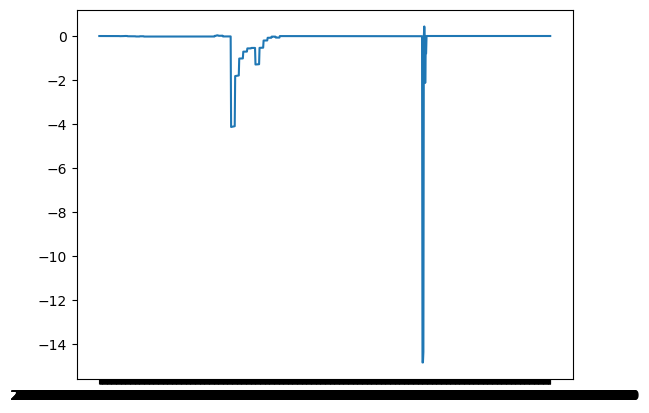

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(kj['index'][0:1000], kj['data'][0:1000])
plt.show()

In [ ]:
# remove at the end of the notebook; needed for module exposure
sys.path.remove("../src/")